In [87]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

### $\textbf{Parte 1: }$ random search

In [152]:
def function(x,y):
    g = x**2 + y**2
    return g

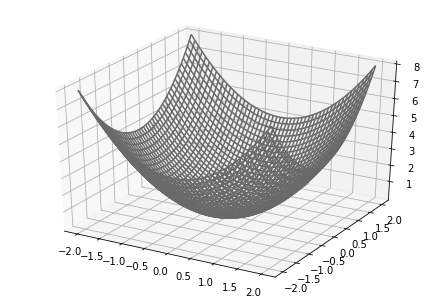

In [153]:
X = np.linspace(-2,2,500)
Y = np.linspace(-2,2,500)
X, Y = np.meshgrid(X, Y)
Z = function(X,Y)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10, color = "dimgrey")
plt.show()

In [154]:
def random_search(n,f,bound_min,bound_max):
    xi = 1
    yi = 1
    f_ref = f(xi,yi)
    xs = [f_ref]
    ys = [f_ref]
    for i in range(n):
        xtest = np.random.uniform(bound_min,bound_max)
        ytest = np.random.uniform(bound_min,bound_max)
        if f(xtest,ytest) < f_ref:
            f_ref = f(xtest,ytest)
            xi = xtest
            yi = ytest
        xs.append(xi)
        ys.append(yi)
    return xs,ys
        
b_lim_min = -1
b_lim_max = 1
xs,ys = random_search(100, function, b_lim_min, b_lim_max)

zs = []
for i in range(len(xs)):
    zs.append(function(xs[i],ys[i]))

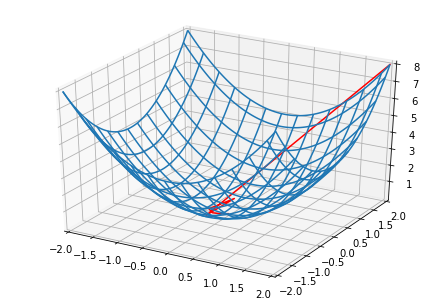

In [155]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(xs, ys, zs, color = "red")
ax.plot_wireframe(X, Y, Z, rstride=40, cstride=40)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()

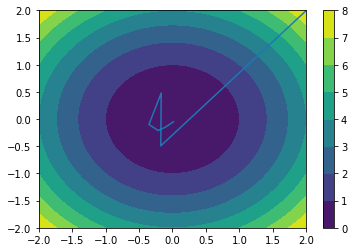

In [156]:
fig, ax = plt.subplots()
cs = ax.contourf(X, Y, Z)
cbar = fig.colorbar(cs)
ax.plot(xs,ys)
plt.show()

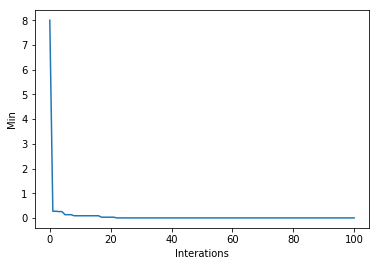

In [157]:
t = [i for i in range(len(xs))]
#yerr = np.linspace(0.05, 0.2, len(xs))
#plt.errorbar(t, zs, yerr=yerr, label='both limits (default)')
plt.plot(t,zs)
plt.xlabel('Interations')
plt.ylabel('Min')
plt.show()

### $\textbf{Parte 2:}$ Gradient Descent

In [158]:
def grad_function(x,y):
    return 2*x, 2*y

In [159]:
from numpy import linalg as LA
def norma(x,y):
    norma_fx = (2*x)/LA.norm(2*x+2*y)
    norma_fy = (2*y)/LA.norm(2*x+2*y)
    return norma_fx, norma_fy

In [160]:
def next_point(x, y, alpha):
    step = 1*alpha
    normax, normay = norma(x,y)
    rx = x- step*normax
    ry = y- step*normay
    return rx, ry

In [161]:
X = np.linspace(-2,2,15)
Y = np.linspace(-2,2,15)
X_grad, Y_grad = grad_function(X,Y)
U, V = np.meshgrid(X_grad, Y_grad)

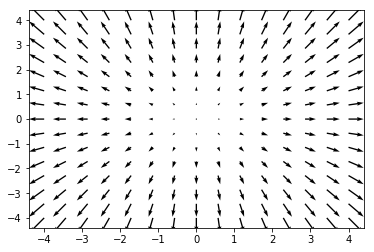

In [162]:
fig, ax = plt.subplots()
q = ax.quiver(X_grad, Y_grad, U, V)
ax.quiverkey(q, X=0.3, Y=1.1, U=10,
             label='Quiver key, length = 10', labelpos='E')
plt.show()

In [163]:
def gradient_descent(n,xi = 2, yi = 2):
    xs = []
    ys = []
    xs.append(xi)
    ys.append(yi)
    alpha = np.random.uniform(0,1)
    for i in range(n):
        xi,yi = next_point(xi,yi,alpha)
        xs.append(xi)
        ys.append(yi)
    return xs, ys

In [164]:
xs,ys = gradient_descent(100)
zs = []
for i in range(len(xs)):
    zs.append(function(xs[i],ys[i]))

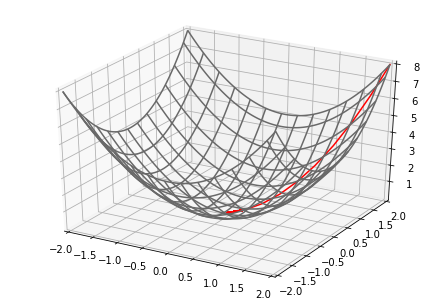

In [165]:
X = np.linspace(-2,2,500)
Y = np.linspace(-2,2,500)
X, Y = np.meshgrid(X, Y)
Z = function(X,Y)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(xs, ys, zs, color = "red")
ax.plot_wireframe(X, Y, Z, rstride=40, cstride=40, color = 'dimgrey')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()

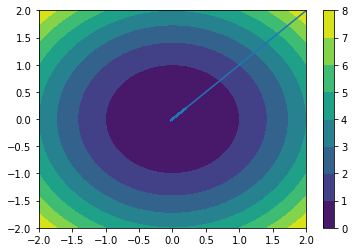

In [166]:
fig, ax = plt.subplots()
cs = ax.contourf(X, Y, Z)
cbar = fig.colorbar(cs)
ax.plot(xs,ys)
plt.show()

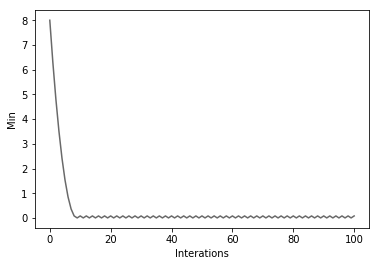

In [167]:
plt.plot(t,zs, color = 'dimgrey')
plt.xlabel('Interations')
plt.ylabel('Min')
plt.show()